### ライブラリーインポート

In [316]:
import win32gui
import win32api
import win32con
import time
from PIL import ImageGrab
import ctypes
from ctypes import sizeof
from ctypes.wintypes import RECT
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pyautogui

### クリック

In [317]:
def Click(x, y):
    HWND = win32gui.FindWindow(None, "NoxPlayer")
    lParam = win32api.MAKELONG(x, y)
    win32api.SendMessage(HWND, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, lParam)
    time.sleep(0.1)
    win32api.SendMessage(HWND, win32con.WM_LBUTTONUP,0, lParam)

### ドラッグ

In [312]:
def Drag(x_s,y_s,x_e,y_e):
    HWND = win32gui.FindWindow(None, "NoxPlayer")
    lParam_start = win32api.MAKELONG(x_s, y_s)
    lParam_end = win32api.MAKELONG(x_e, y_e)
    win32api.SendMessage(HWND, win32con.WM_LBUTTONDOWN, 1, lParam_start)
    time.sleep(0.1)
    win32api.SendMessage(HWND, win32con.WM_LBUTTONUP, 0, lParam_end)

### 画面キャプチャー

In [212]:
def Capture():
    HWND = win32gui.FindWindow(None, "NoxPlayer")
    rect = win32gui.GetWindowRect(HWND)
    grabed_image = ImageGrab.grab()
    croped_image = grabed_image.crop(rect)
    screen=np.asarray(croped_image)
    screen_bgr = cv2.cvtColor(screen, cv2.COLOR_BGR2RGB)
    return screen_bgr

### マッチング(ボタン位置取得)

In [213]:
def Matching(template,screen):
    #画像サイズ取得
    h, w = template.shape[0:2]
    # Apply template Matching
    res = cv2.matchTemplate(screen,template,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #しきい値によって存在の有無の判断
    judge=Judge_Matching(max_val)
    print(judge)
    print("threshold=",max_val)
    # Show result
    screen_result=screen.copy()
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(screen_result,top_left, bottom_right, 255, 15)
    img_rgb = cv2.cvtColor(screen_result, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    center_x=top_left[0]+w/2
    center_y=top_left[1]+h/2
    return center_x, center_y,judge

In [242]:
def Matching_gray(template,screen):
    #画像サイズ取得
    h, w = template.shape[0:2]
    # Apply template Matching
    res = cv2.matchTemplate(screen,template,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #しきい値によって存在の有無の判断
    judge=Judge_Matching_battle(max_val)
    print(judge)
    print("threshold=",max_val)
    # Show result
    screen_result=screen.copy()
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(screen_result,top_left, bottom_right, 255, 15)
    img_rgb = cv2.cvtColor(screen_result, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    center_x=top_left[0]+w/2
    center_y=top_left[1]+h/2
    return center_x, center_y,judge

### マッチング成功or失敗の判断(閾値による)

In [215]:
def Judge_Matching(num):
    THRESHOLD=0.9#閾値
    if THRESHOLD < num:
        return True
    else:
        return False

In [241]:
def Judge_Matching_battle(num):
    THRESHOLD=0.8#閾値
    if THRESHOLD < num:
        return True
    else:
        return False

### テンプレート取得関数

#### バトルまでのテンプレート関数

In [216]:
def Get_template():
    #画像読み込み
    SOLO= cv2.imread('../../Users/gaife/Desktop/restarting/solo.png',1)
    BATU= cv2.imread('../../Users/gaife/Desktop/restarting/batu.png',1)
    HOME= cv2.imread('../../Users/gaife/Desktop/restarting/home.png',1)
    MAIN= cv2.imread('../../Users/gaife/Desktop/restarting/mainstory.png',1)
    START= cv2.imread('../../Users/gaife/Desktop/restarting/start.png',1)
    START2= cv2.imread('../../Users/gaife/Desktop/restarting/start2.png',1)
    OK= cv2.imread('../../Users/gaife/Desktop/restarting/ok.png',1)
    SKIP= cv2.imread('../../Users/gaife/Desktop/restarting/skip.png',1)
    #テンプレート作成
    template=[START2, MAIN, HOME, START, OK, SOLO, BATU, SKIP]
    return template

#### バトル用のテンプレート関数

In [217]:
def Get_template_number():
    #画像読み込み
    ONE= cv2.imread('../../Users/gaife/Desktop/restarting/number/1.png',0)
    TWO= cv2.imread('../../Users/gaife/Desktop/restarting/number/2.png',0)
    THREE= cv2.imread('../../Users/gaife/Desktop/restarting/number/3.png',0)
    FOUR= cv2.imread('../../Users/gaife/Desktop/restarting/number/4.png',0)
    SIX= cv2.imread('../../Users/gaife/Desktop/restarting/number/6.png',0)
    #テンプレート作成
    template=[SIX, FOUR, THREE, TWO, ONE]
    return template

In [218]:
def To_battle():
    #初期化
    next=False
    #画像取得
    screen=Capture()
    #テンプレート取得
    template=Get_template()
    #テンプレートでバトル画面まで進む
    for i in range(len(template)):
        x,y,judge=Matching(template[i],screen)
        if judge==True:
            Click(int(x),int(y))
            next=True
    #バトル中か判断
    BATTLE= cv2.imread('../../Users/gaife/Desktop/restarting/battle.png',1)
    print("battle")
    x,y,judge=Matching(BATTLE,screen)
    if judge==True:
        Click(721,530)#手札をクリックし拡大
        next=True
    #見つからなくなった場合適当にクリック        
    if next!=True:
         Click(400,200)#適当に中央クリック
         print("random click")

False
threshold= 0.17145225405693054


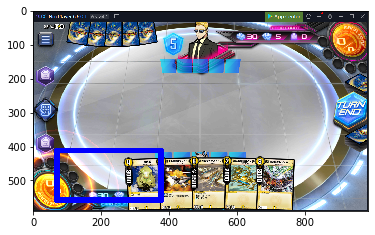

False
threshold= 0.37072503566741943


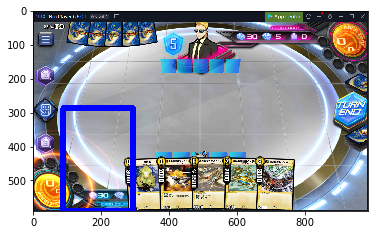

False
threshold= 0.2647671699523926


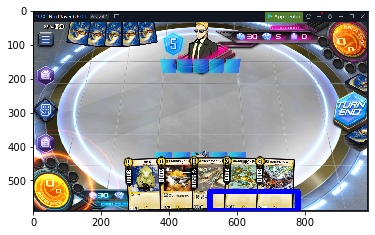

False
threshold= 0.3371976315975189


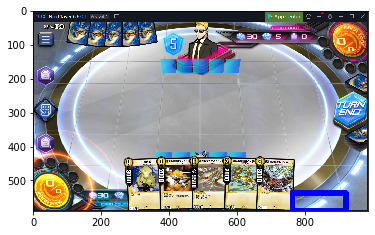

False
threshold= 0.3360562026500702


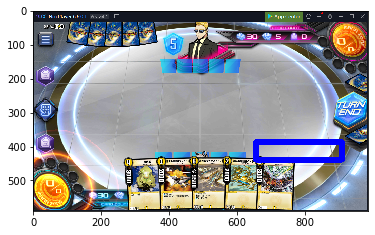

False
threshold= 0.3699544668197632


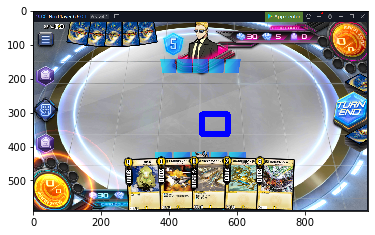

False
threshold= 0.39150434732437134


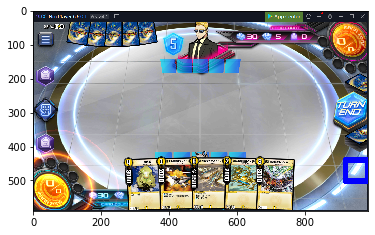

False
threshold= 0.4225390553474426


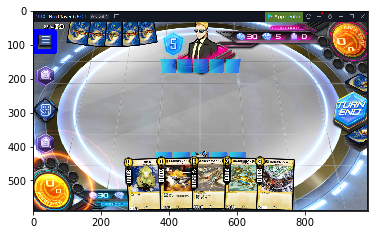

battle
True
threshold= 1.0


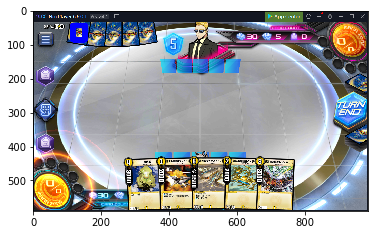

In [160]:
To_battle()

True
threshold= 0.8437857627868652


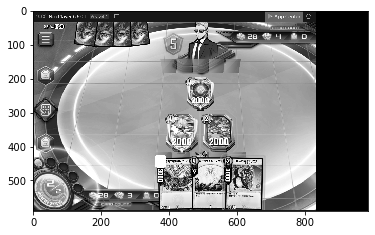

In [315]:
#初期化
next=False
judge=False
#画像取得
screen=Capture()
screen_gray=cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
#テンプレート取得
template=Get_template_number()
#テンプレートでバトル画面まで進む
ite=0
while judge==False:
    x,y,judge=Matching_gray(template[ite],screen_gray)
    if judge==True:
            Click(int(x)+50,int(y))
            time.sleep(0.5)
            Drag(int(x)+50,int(y)+50, 54, 524)#マナに送る
    ite++1;